In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/AuBDA13CH2/run2'
# os.chdir(new_path)

(1e-06, 2.1593807577448514)

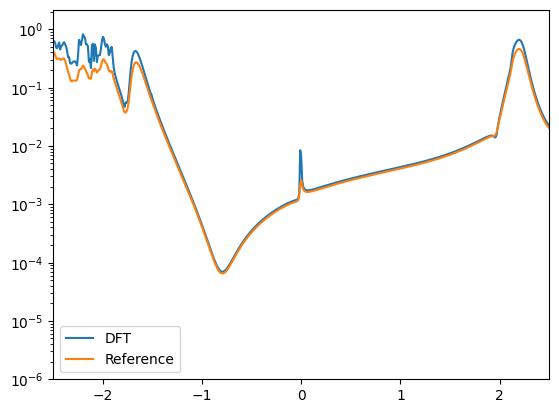

In [2]:
E_ref, T_ref = np.load("../reference/ET_dft.npy")
E,T_dft = np.load("./output/lowdin/dft_transmission.npy")
plt.plot(E, T_dft, label='DFT')
plt.plot(E_ref,T_ref,label="Reference")
plt.yscale('log')
plt.legend()
plt.xlim(-2.5,2.5)
plt.ylim(bottom=1e-6)